##Previously, we went over how to model a neuron from scratch using very basic libraries that weren't specifically intended for neuron modeling.  The great thing about Python is that there are thousands of libraries: one, NEURON, is specifically used for modeling neuron firing activity.  Let's try to use it.

In [ ]:
#Installing the package named "neuron".
#In Python, you use the command "pip install [package_name]".
!pip install neuron
#! is because of Google Colab
#Every package officially registered with "pip" will have a specific name, so be careful you type it out exactly as documentation specifies.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.0/15.0 MB 10.0 MB/s eta 0:00:00


#Using a library can feel like learning a new language.  You need to get used to the vocabulary.  Libraries will change vocabulary, but the grammar is typically similar. They make make up new rules for new words, but they usually obey basic Python syntax.  NEURON has defined some functions with special key words. **See if you can identify some of the key variable names.**

#Hint: one of them is "soma".  Which of the variables repeat or are isolated by comments (#)?

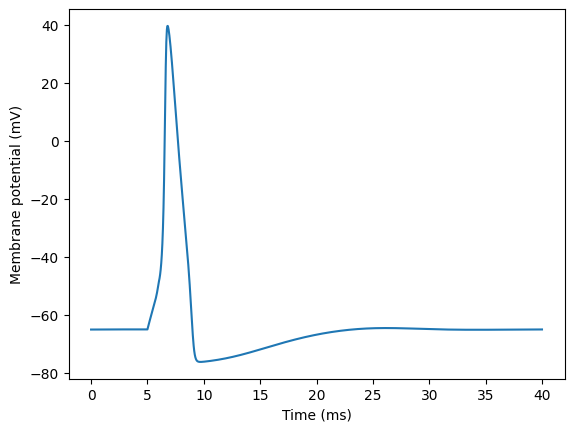

In [ ]:
#Some libraries have specific functions or packages we can call.
#In this case, we want specifically the "h" and "gui" functions of the libary "neuron".  It's like checking out a specific book from Shields.
from neuron import h, gui

# Create a soma (cell body) section
#Variables can have attributes or methods, such as variable.attribute will return something different
soma = h.Section(name='soma')
soma.L = 20  # Length of the soma
soma.diam = 20  # Diameter of the soma
soma.insert('hh')  # Insert Hodgkin-Huxley channels.   You can specify other functions by replacing 'hh', like pas.

# Create a stimulus.  Change the time window
stim = h.IClamp(soma(0.5))
stim.delay = 5  # Start of the stimulus
stim.dur = 1  # Duration of the stimulus
stim.amp = 0.2  # Amplitude of the stimulus

# Record the membrane potential
v = h.Vector().record(soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

# Run the simulation.  Change the time window of viewing.
h.finitialize(-65)
h.continuerun(40)

# Plot results
import matplotlib.pyplot as plt
plt.plot(t, v)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.show()


#Looks very similar to how we did it in Python, but with much less words.  **See if you can identify the content of the variables.**  What do they actually store and how are they used?

##Hint: use print(variable_name), list(), len, etc.  Use brackets such as print(variable[:i]) to select only a few indices.  Look up common built-in python if you are still interested

In [ ]:
#Here is code to make your life easier to index.
#v and t are a special 'slice' object not a list.
#The code above creates a new list and adds them to the list
# Iterate through the v and append elements to the new list
t_list = []
v_list = []
for i in range(len(v)):
    v_list.append(v.x[i]) #Assuming v has an attribute 'x' to access elements. if not, adjust accordingly
for i in range(len(t)):
    t_list.append(t.x[i]) #Assuming v has an attribute 'x' to access elements. if not, adjust accordingly


In [ ]:
##Put your sample code in this cell here below:
#Use v_list and t_list instead of v and t




#Possible answer is at the bottom of the notebook

##Okay, I know it's a bit much, but that's why we can get help.  **Try to make a function that models two neurons: one (presynaptic) neuron that activates the second (postsynaptic).**  Since you just started, I don't expect you to know everything, so feel free to use ChatGPT, Claude, or whatever Generative AI you want.

##Hint: specify you want to use the Python package **NEURON**

In [ ]:
##Input your code below here in this cell:





















##Answer:

#Some key variables: soma (cell body), stim (stimulation), v (voltage), t (time), nc (net connection), syn (synapse), h (core NEURON interpreter; imported)

In [ ]:
##Q1:
#given
t_list = []
v_list = []
for i in range(len(v)):
    v_list.append(v.x[i]) #Assuming v has an attribute 'x' to access elements. if not, adjust accordingly
for i in range(len(t)):
    t_list.append(t.x[i]) #Assuming v has an attribute 'x' to access elements. if not, adjust accordingly

#answer
print(t_list[:5])
print(v_list[:5])
print(soma)
print(stim)
print(stim.delay)

#From this I know v and t are splices/lists of numbers.
#Soma is a string.  The code specified it
#Stim itself is a bit foreign
#Bwhen I print its objects with .delay, I see it contains the numbers I specified

[0.0, 0.025, 0.05, 0.075, 0.09999999999999999]
[-65.0, -64.99925452909274, -64.99852075227696, -64.9977978475833, -64.99708508702204]
soma
IClamp[0]
5.0


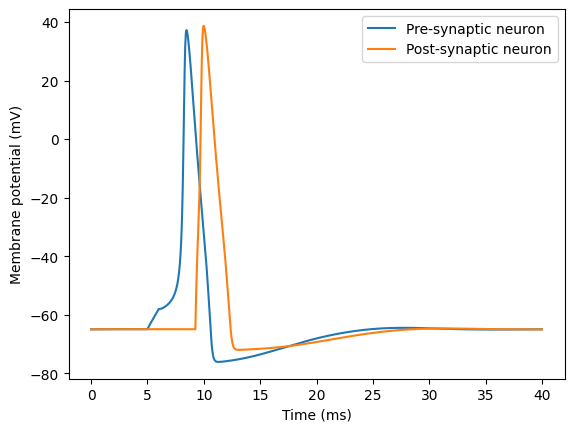

In [ ]:
# Create two neurons
pre_neuron = h.Section(name='pre_neuron')
post_neuron = h.Section(name='post_neuron')
pre_neuron.L = pre_neuron.diam = 20
post_neuron.L = post_neuron.diam = 20
pre_neuron.insert('hh')
post_neuron.insert('hh')

# Stimulus for the presynaptic neuron
stim_pre = h.IClamp(pre_neuron(0.5))
stim_pre.delay = 5
stim_pre.dur = 1
stim_pre.amp = 0.1

# Synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron(0.5))
syn.tau = 2  # Decay time constant

# Connect the presynaptic neuron to the postsynaptic neuron
nc = h.NetCon(pre_neuron(0.5)._ref_v, syn, sec=pre_neuron)
nc.weight[0] = 0.04  # Synaptic weight

# Record the membrane potential of both neurons
v_pre = h.Vector().record(pre_neuron(0.5)._ref_v)
v_post = h.Vector().record(post_neuron(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

# Run the simulation
h.finitialize(-65)
h.continuerun(40)

# Plot results
plt.plot(t, v_pre, label='Pre-synaptic neuron')
plt.plot(t, v_post, label='Post-synaptic neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend()
plt.show()
